# Predict A Doctor's Consultation Fee 



We have all been in situation where we go to a doctor in emergency and find that the consultation fees are too high. As a data scientist we all should do better. What if you have data that records important details about a doctor and you get to build a model to predict the doctor’s consulting fee.? This is the hackathon that lets you do that.



Size of training set: 5961 records

Size of test set: 1987 records

FEATURES:

Qualification: Qualification and degrees held by the doctor

Experience: Experience of the doctor in number of years

Rating: Rating given by patients

Profile: Type of the doctor

Miscellaeous_Info: Extra information about the doctor

Fees: Fees charged by the doctor

Place: Area and the city where the doctor is located.

In [1]:
# Importing necesssary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading Datasets
df=pd.read_csv("Final_Train.csv")
df.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [3]:
#Loading Datasets
df_test=pd.read_csv("Final_Test.csv")
df_test.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...


Avg. Fees =  307.9446401610468


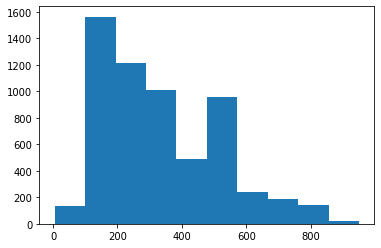

In [4]:
# Let's see the count of Tearget variables Fees
plt.hist(df['Fees'])
# Average Fees Looks is around 308
print('Avg. Fees = ',df.Fees.mean())

In [5]:
# Checking shape of dataset

df.shape, df_test.shape

((5961, 7), (1987, 6))

In [6]:
# Let's check null values
df.isnull().sum(),df_test.isnull().sum()
# There are null values in Rating, Place, Miscellaneous_Info

(Qualification            0
 Experience               0
 Rating                3302
 Place                   25
 Profile                  0
 Miscellaneous_Info    2620
 Fees                     0
 dtype: int64,
 Qualification            0
 Experience               0
 Rating                1090
 Place                    6
 Profile                  0
 Miscellaneous_Info     834
 dtype: int64)

In [7]:
df.describe(include='all')

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
count,5961,5961,2659,5936,5961,3341,5961.000000
unique,1420,64,51,877,6,2998,NaN
top,BDS,9 years experience,100%,"HSR Layout, Bangalore",Dentist,Acrylic Partial Denture Crowns and Bridges Fix...,NaN
freq,488,323,684,75,1397,40,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,307.944640
std,NaN,NaN,NaN,NaN,NaN,NaN,190.920373
min,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,150.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,300.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,500.000000


In [8]:
df.Miscellaneous_Info
# We can drop this column
df.drop('Miscellaneous_Info',axis=1,inplace=True)
df_test.drop('Miscellaneous_Info',axis=1,inplace=True)

In [9]:
# Let's replace nulls in Place with the mode
df.Place=df.Place.fillna(df.Place.mode()[0])
df_test.Place=df_test.Place.fillna(df_test.Place.mode()[0])

In [10]:
df.isnull().sum(),df_test.isnull().sum()
# We're still left with Rating

(Qualification       0
 Experience          0
 Rating           3302
 Place               0
 Profile             0
 Fees                0
 dtype: int64,
 Qualification       0
 Experience          0
 Rating           1090
 Place               0
 Profile             0
 dtype: int64)

In [11]:
df.Rating.value_counts()
# Let's first remove %

100%    684
98%     290
99%     259
97%     241
96%     220
95%     178
94%     115
93%     109
92%      66
90%      66
91%      60
89%      42
88%      41
85%      27
82%      23
86%      21
83%      21
80%      19
77%      16
87%      14
84%      13
79%      13
67%      12
81%      12
76%       9
71%       9
75%       8
73%       8
74%       7
60%       7
78%       6
68%       5
56%       5
69%       4
70%       4
72%       3
57%       3
62%       2
64%       2
55%       2
63%       2
33%       2
58%       1
65%       1
40%       1
36%       1
47%       1
48%       1
7%        1
45%       1
53%       1
Name: Rating, dtype: int64

In [12]:
# Removing % and converting to float
df['Rating']=df['Rating'].str.replace('%','').astype(float)
df_test['Rating']=df_test['Rating'].str.replace('%','').astype(float)

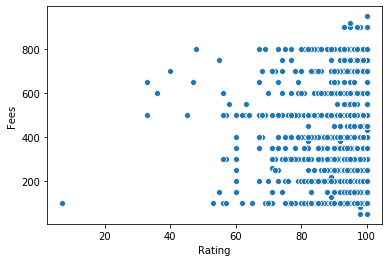

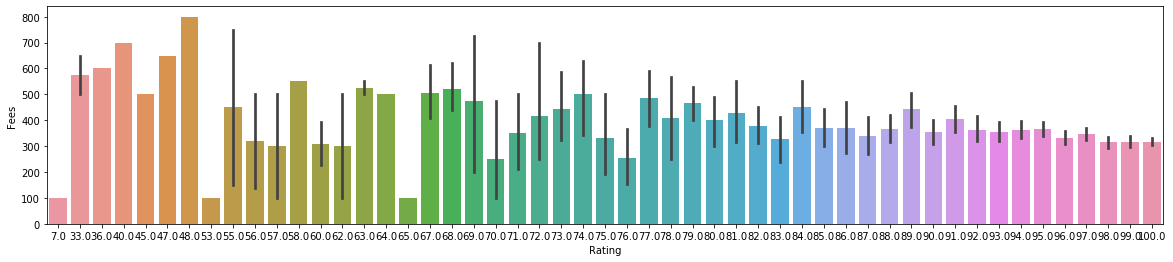

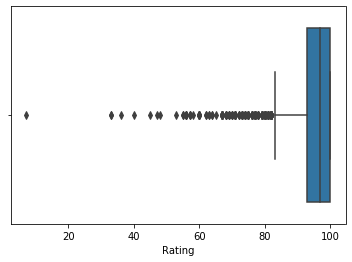

In [13]:
# We will drop this column before Modelling as replacing will lead to lot of errors due to large NaNs, 
#but first let's do the EDA for Rating
sns.scatterplot('Rating','Fees',data=df)
plt.show()
plt.figure(figsize=(20,4))
sns.barplot('Rating','Fees',data=df)
plt.show()
sns.boxplot('Rating',data=df,orient='h')
plt.show()

In [14]:
#Let's fill NaNs with 0
df['Rating']=df['Rating'].fillna(0)
df_test['Rating']=df_test['Rating'].fillna(0)

In [15]:
# Let's bin the experience
df['Rating_bin'] = pd.cut(x=df['Rating'], bins=[-1, 20, 40, 60, 80, 101])
df_test['Rating_bin'] = pd.cut(x=df_test['Rating'], bins=[-1, 20, 40, 60, 80, 101])

#Dropping Experience
df.drop('Rating',axis=1,inplace=True)
df_test.drop('Rating',axis=1,inplace=True)

df_test.head()

,Qualification,Experience,Place,Profile,Rating_bin
0,MBBS,35 years experience,"Ghatkopar East, Mumbai",General Medicine,"(-1, 20]"
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,"West Marredpally, Hyderabad",ENT Specialist,"(-1, 20]"
2,"MBBS, DDVL",40 years experience,"KK Nagar, Chennai",Dermatologists,"(60, 80]"
3,BAMS,0 years experience,"New Ashok Nagar, Delhi",Ayurveda,"(-1, 20]"
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,"Kanakpura Road, Bangalore",Dentist,"(80, 101]"


In [16]:
# Lets remove ' years experience' from Experience feature and convert to int
df.Experience = df.Experience.str.replace(' years experience','').astype(int)
df_test.Experience = df_test.Experience.str.replace(' years experience','').astype(int)

In [17]:
df.head()

,Qualification,Experience,Place,Profile,Fees,Rating_bin
0,"BHMS, MD - Homeopathy",24,"Kakkanad, Ernakulam",Homeopath,100,"(80, 101]"
1,"BAMS, MD - Ayurveda Medicine",12,"Whitefield, Bangalore",Ayurveda,350,"(80, 101]"
2,"MBBS, MS - Otorhinolaryngology",9,"Mathikere - BEL, Bangalore",ENT Specialist,300,"(-1, 20]"
3,"BSc - Zoology, BAMS",12,"Bannerghatta Road, Bangalore",Ayurveda,250,"(-1, 20]"
4,BAMS,20,"Keelkattalai, Chennai",Ayurveda,250,"(80, 101]"


Experience
33    385.483871
50    366.666667
28    354.512195
31    353.636364
52    350.000000
29    349.253731
22    345.782313
27    344.285714
26    344.225352
14    342.111554
Name: Fees, dtype: float64

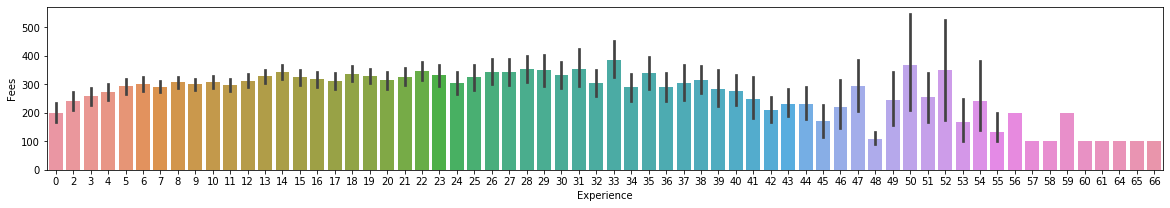

In [18]:
plt.figure(figsize=(20,3))
sns.barplot('Experience','Fees',data=df)
# Top 10 Fees based on Experience
df.groupby(['Experience'])['Fees'].mean().sort_values(ascending=False)[:10]

In [19]:
# Let's bin the experience
df['exp_bins'] = pd.cut(x=df['Experience'], bins=[-1, 15, 30, 45, 60, 100])
df_test['exp_bins'] = pd.cut(x=df_test['Experience'], bins=[-1, 15, 30, 45, 60, 100])

#Dropping Experience
df.drop('Experience',axis=1,inplace=True)
df_test.drop('Experience',axis=1,inplace=True)

df_test.head()

,Qualification,Place,Profile,Rating_bin,exp_bins
0,MBBS,"Ghatkopar East, Mumbai",General Medicine,"(-1, 20]","(30, 45]"
1,"MBBS, Diploma in Otorhinolaryngology (DLO)","West Marredpally, Hyderabad",ENT Specialist,"(-1, 20]","(30, 45]"
2,"MBBS, DDVL","KK Nagar, Chennai",Dermatologists,"(60, 80]","(30, 45]"
3,BAMS,"New Ashok Nagar, Delhi",Ayurveda,"(-1, 20]","(-1, 15]"
4,"BDS, MDS - Conservative Dentistry & Endodontics","Kanakpura Road, Bangalore",Dentist,"(80, 101]","(15, 30]"


exp_bins
(15, 30]     328.562532
(-1, 15]     301.604330
(30, 45]     293.426052
(45, 60]     232.547170
(60, 100]    100.000000
Name: Fees, dtype: float64

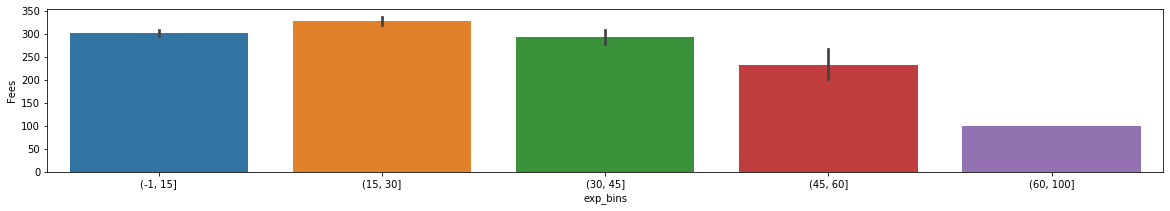

In [20]:
plt.figure(figsize=(20,3))
sns.barplot('exp_bins','Fees',data=df)
# Top 10 Fees based on Experience
df.groupby(['exp_bins'])['Fees'].mean().sort_values(ascending=False)
# 15-30 have high fees and 60+ charge lower avg. fees

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

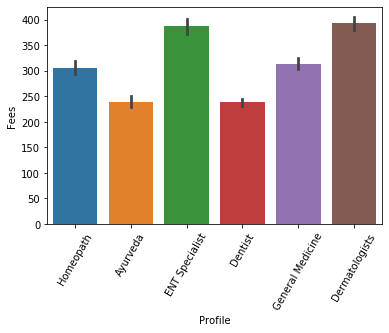

In [21]:
#Price grouped by profile
sns.barplot('Profile','Fees',data=df)
plt.xticks(rotation=60)
# ENT SPrecialists and Dermatologists charge the most

In [22]:
df.head()

,Qualification,Place,Profile,Fees,Rating_bin,exp_bins
0,"BHMS, MD - Homeopathy","Kakkanad, Ernakulam",Homeopath,100,"(80, 101]","(15, 30]"
1,"BAMS, MD - Ayurveda Medicine","Whitefield, Bangalore",Ayurveda,350,"(80, 101]","(-1, 15]"
2,"MBBS, MS - Otorhinolaryngology","Mathikere - BEL, Bangalore",ENT Specialist,300,"(-1, 20]","(-1, 15]"
3,"BSc - Zoology, BAMS","Bannerghatta Road, Bangalore",Ayurveda,250,"(-1, 20]","(-1, 15]"
4,BAMS,"Keelkattalai, Chennai",Ayurveda,250,"(80, 101]","(15, 30]"


In [23]:
#Qualification
df['Qualification'].value_counts()

BDS                                                                          488
BHMS                                                                         477
BAMS                                                                         471
MBBS                                                                         334
MBBS, MS - ENT                                                               220
                                                                            ... 
MD - Ayurvedic Obstetrics and Gynecology, BAMS                                 1
MBBS, PG in Diabetology                                                        1
MBBS, Diploma in Acupuncture                                                   1
BAMS, Certificate Course In Therapeutic Yoga                                   1
BDS, MDS - Prosthodontics, International Certificate in Implant Dentistry      1
Name: Qualification, Length: 1420, dtype: int64

In [24]:
df2=df["Qualification"].apply(lambda x: x.split(','))
df2
# Some doctors have multiple degrees and some have fewer. maybe we can create a feature with count of qualifications

0                [BHMS,  MD - Homeopathy]
1         [BAMS,  MD - Ayurveda Medicine]
2       [MBBS,  MS - Otorhinolaryngology]
3                  [BSc - Zoology,  BAMS]
4                                  [BAMS]
                      ...                
5956                    [MBBS,  MS - ENT]
5957                               [MBBS]
5958                               [MBBS]
5959       [MBBS,  MD - General Medicine]
5960           [BDS,  MDS - Orthodontics]
Name: Qualification, Length: 5961, dtype: object

In [25]:
# Let's make new feature to store no. of degrees
df['len_qual']=0
for i in range(len(df2)):
    df['len_qual'][i]=len(df2[i])

In [26]:
# Repeating for test
df3=df_test["Qualification"].apply(lambda x: x.split(','))
df_test['len_qual']=0
for i in range(len(df3)):
    df_test['len_qual'][i]=len(df3[i])

df.head()

,Qualification,Place,Profile,Fees,Rating_bin,exp_bins,len_qual
0,"BHMS, MD - Homeopathy","Kakkanad, Ernakulam",Homeopath,100,"(80, 101]","(15, 30]",2
1,"BAMS, MD - Ayurveda Medicine","Whitefield, Bangalore",Ayurveda,350,"(80, 101]","(-1, 15]",2
2,"MBBS, MS - Otorhinolaryngology","Mathikere - BEL, Bangalore",ENT Specialist,300,"(-1, 20]","(-1, 15]",2
3,"BSc - Zoology, BAMS","Bannerghatta Road, Bangalore",Ayurveda,250,"(-1, 20]","(-1, 15]",2
4,BAMS,"Keelkattalai, Chennai",Ayurveda,250,"(80, 101]","(15, 30]",1


In [27]:
# Dropping Qualification
#df.drop('Qualification',axis=1,inplace=True)
#df_test.drop('Qualification',axis=1,inplace=True)
df.head()

,Qualification,Place,Profile,Fees,Rating_bin,exp_bins,len_qual
0,"BHMS, MD - Homeopathy","Kakkanad, Ernakulam",Homeopath,100,"(80, 101]","(15, 30]",2
1,"BAMS, MD - Ayurveda Medicine","Whitefield, Bangalore",Ayurveda,350,"(80, 101]","(-1, 15]",2
2,"MBBS, MS - Otorhinolaryngology","Mathikere - BEL, Bangalore",ENT Specialist,300,"(-1, 20]","(-1, 15]",2
3,"BSc - Zoology, BAMS","Bannerghatta Road, Bangalore",Ayurveda,250,"(-1, 20]","(-1, 15]",2
4,BAMS,"Keelkattalai, Chennai",Ayurveda,250,"(80, 101]","(15, 30]",1


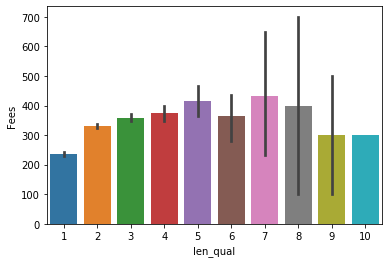

In [28]:
sns.barplot('len_qual','Fees',data=df)
# Those with 7 Qualifications have highest Fees

In [29]:
# Place
df.Place.values

array(['Kakkanad, Ernakulam', 'Whitefield, Bangalore',
       'Mathikere - BEL, Bangalore', ..., 'Greater Kailash Part 2, Delhi',
       'Vileparle West, Mumbai', 'Pitampura, Delhi'], dtype=object)

In [30]:
df.Place.describe()

count                      5961
unique                      877
top       HSR Layout, Bangalore
freq                        100
Name: Place, dtype: object

In [31]:
# Extracting Region and City
df['region']=df["Place"].apply(lambda x: x.split(',')[0])
df['region'][:10]

df_test['region']=df_test["Place"].apply(lambda x: x.split(',')[0])
df_test['region'][:10]

0      Ghatkopar East
1    West Marredpally
2            KK Nagar
3     New Ashok Nagar
4      Kanakpura Road
5           Velachery
6         Frazer Town
7             Attapur
8        Banashankari
9    Mayur Vihar Ph-I
Name: region, dtype: object

In [32]:
df['city']=df["Place"].apply(lambda x: x.split(', ')[-1])
df['city'][:10]

df_test['city']=df_test["Place"].apply(lambda x: x.split(', ')[-1])
df_test['city'][:10]

0       Mumbai
1    Hyderabad
2      Chennai
3        Delhi
4    Bangalore
5      Chennai
6    Bangalore
7    Hyderabad
8    Bangalore
9        Delhi
Name: city, dtype: object

In [33]:
# Now we can drop Place
df.drop('Place',axis=1,inplace=True)
df_test.drop('Place',axis=1,inplace=True)

In [34]:
df.head()

,Qualification,Profile,Fees,Rating_bin,exp_bins,len_qual,region,city
0,"BHMS, MD - Homeopathy",Homeopath,100,"(80, 101]","(15, 30]",2,Kakkanad,Ernakulam
1,"BAMS, MD - Ayurveda Medicine",Ayurveda,350,"(80, 101]","(-1, 15]",2,Whitefield,Bangalore
2,"MBBS, MS - Otorhinolaryngology",ENT Specialist,300,"(-1, 20]","(-1, 15]",2,Mathikere - BEL,Bangalore
3,"BSc - Zoology, BAMS",Ayurveda,250,"(-1, 20]","(-1, 15]",2,Bannerghatta Road,Bangalore
4,BAMS,Ayurveda,250,"(80, 101]","(15, 30]",1,Keelkattalai,Chennai


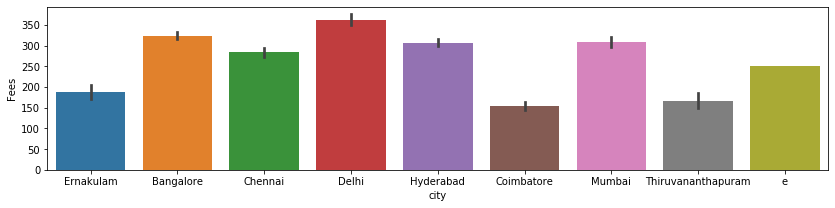

In [35]:
plt.figure(figsize=(14,3))
sns.barplot('city','Fees',data=df)
# Delhi Mumbai, Bangalore have high Fees. There's a city called 'e'. Let's check that

In [36]:
print(df[df['city']=='e'])
# Tis Seems to be an error. Let's drop this
df.drop(df[df['city'] == 'e'].index, inplace = True) 

     Qualification  Profile  Fees Rating_bin  exp_bins  len_qual region city
3980           BDS  Dentist   250   (-1, 20]  (15, 30]         1      e    e


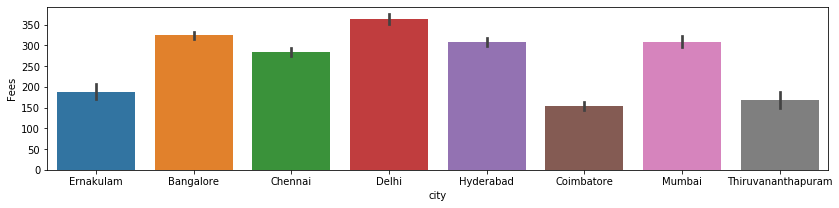

In [37]:
plt.figure(figsize=(14,3))
sns.barplot('city','Fees',data=df)
# Delhi Mumbai, Bangalore have high Fees. There's a city called 'e'. Let's check that

In [38]:
df_test.city.value_counts()
#'e' is not present in test dataset

Bangalore             420
Delhi                 417
Mumbai                395
Hyderabad             333
Chennai               287
Coimbatore             70
Ernakulam              48
Thiruvananthapuram     17
Name: city, dtype: int64

In [39]:
print(df.region.value_counts())

HSR Layout          100
Andheri West         70
Dwarka               68
Banjara Hills        64
Mulund West          54
                   ... 
Sithalapakkam         1
Nayandahalli          1
Tis Hazari            1
Chinmaya Nagar        1
Dwarka Sector 10      1
Name: region, Length: 865, dtype: int64


In [40]:
df.head()

,Qualification,Profile,Fees,Rating_bin,exp_bins,len_qual,region,city
0,"BHMS, MD - Homeopathy",Homeopath,100,"(80, 101]","(15, 30]",2,Kakkanad,Ernakulam
1,"BAMS, MD - Ayurveda Medicine",Ayurveda,350,"(80, 101]","(-1, 15]",2,Whitefield,Bangalore
2,"MBBS, MS - Otorhinolaryngology",ENT Specialist,300,"(-1, 20]","(-1, 15]",2,Mathikere - BEL,Bangalore
3,"BSc - Zoology, BAMS",Ayurveda,250,"(-1, 20]","(-1, 15]",2,Bannerghatta Road,Bangalore
4,BAMS,Ayurveda,250,"(80, 101]","(15, 30]",1,Keelkattalai,Chennai


In [41]:
df.dtypes,df_test.dtypes


(Qualification      object
 Profile            object
 Fees                int64
 Rating_bin       category
 exp_bins         category
 len_qual            int64
 region             object
 city               object
 dtype: object,
 Qualification      object
 Profile            object
 Rating_bin       category
 exp_bins         category
 len_qual            int64
 region             object
 city               object
 dtype: object)

In [42]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['exp_bins'] = df['exp_bins'].apply(LabelEncoder().fit_transform)
df_test['exp_bins'] = df_test['exp_bins'].apply(LabelEncoder().fit_transform)

df['Rating_bin'] = df['Rating_bin'].apply(LabelEncoder().fit_transform)
df_test['Rating_bin'] = df_test['Rating_bin'].apply(LabelEncoder().fit_transform)

In [43]:
# Other Columns to label encode
col=['Profile','city','region','Qualification']
df[col] = df[col].apply(LabelEncoder().fit_transform)
df_test[col] = df_test[col].apply(LabelEncoder().fit_transform)

In [44]:
df.head()

,Qualification,Profile,Fees,Rating_bin,exp_bins,len_qual,region,city
0,401,5,100,4,1,2,296,4
1,73,0,350,4,0,2,855,0
2,1135,3,300,0,0,2,452,0
3,464,0,250,0,0,2,68,0
4,10,0,250,4,1,1,335,1


In [45]:
df_test.head()

,Qualification,Profile,Rating_bin,exp_bins,len_qual,region,city
0,241,4,0,2,1,142,6
1,340,3,0,2,2,577,5
2,258,2,3,2,2,212,1
3,6,0,0,0,1,373,3
4,79,1,4,1,2,231,0


In [46]:
# Let's separate Features and Labels
df_x=df.drop(columns=["Fees"])
y=df[["Fees"]]

In [47]:
# Let's do Standard Scaling(x)
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)
x.head()

,Qualification,Profile,Rating_bin,exp_bins,len_qual,region,city
0,-0.473503,1.542838,1.144355,0.483758,0.006439,-0.447044,0.415433
1,-1.266159,-1.473008,1.144355,-0.811479,0.006439,1.744195,-1.324844
2,1.300305,0.336500,-0.892484,-0.811479,0.006439,0.164465,-1.324844
3,-0.321256,-1.473008,-0.892484,-0.811479,0.006439,-1.340787,-1.324844
4,-1.418407,-1.473008,1.144355,0.483758,-1.030703,-0.294167,-0.889775


# Modelling

In [48]:
#to find random stat which gives maximum r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
def maxr2_score(model,x,y):
    max_r_score=0
    for r_state in range(42,101):
        x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = r_state,test_size=0.20)
        model.fit(x_train,y_train)
        y_pred = model.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print("max r2 score corresponding to ",final_r_state," is ",max_r_score)
    return final_r_state

In [49]:
#lets make a function which evaluates the model using cross_val_score
from sklearn.model_selection import cross_val_score
def model_evaluation(model,x,y):
    c_scores=cross_val_score(model,x,y,cv=5,scoring="r2")
    print("Mean r2 score for regressor: ",c_scores.mean())
    print("standard deviation in r2 score for regressor: ",c_scores.std())
    print(c_scores)

In [50]:
# Linear Regression

from sklearn.linear_model import LinearRegression
lr=LinearRegression()
r_state=maxr2_score(lr,x,y)

max r2 score corresponding to  94  is  0.14282885106763976


In [51]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
rfr=RandomForestRegressor()
parameters = {"n_estimators":[10,50,100,150,200,250,500]}
clf = GridSearchCV(rfr, parameters, cv=5,scoring="r2")
clf.fit(x,y)
clf.best_params_

{'n_estimators': 500}

In [53]:
rfr=RandomForestRegressor(n_estimators=500)
r_state=maxr2_score(rfr,x,y)

max r2 score corresponding to  94  is  0.22741586946052006


In [54]:
# KNN Regressor
from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor()
parameters = {"n_neighbors":range(2,20)}
clf = GridSearchCV(knr, parameters, cv=5,scoring="r2")
clf.fit(x, y)
clf.best_params_

{'n_neighbors': 19}

In [55]:
knr=KNeighborsRegressor(n_neighbors=19)
r_state=maxr2_score(knr,x,y)

max r2 score corresponding to  94  is  0.17795456355924377


In [56]:
# SVM

from sklearn.svm import SVR
svr=SVR()
parameters={"kernel":["linear", "poly", "rbf"],"C":[0.001,0.01,0.1,1,10]}
clf = GridSearchCV(svr, parameters, cv=5,scoring="r2")
clf.fit(x,y)
clf.best_params_

{'C': 10, 'kernel': 'rbf'}

In [57]:
svr=SVR(kernel="rbf",C=10)
r_state=maxr2_score(svr,x,y)

max r2 score corresponding to  94  is  0.14574202661221414


In [61]:
# Cross Validation

print("\n\nRandomForestRegressor\n\n")
model_evaluation(rfr,x,y)




RandomForestRegressor


Mean r2 score for regressor:  0.1669294025871428
standard deviation in r2 score for regressor:  0.02314457843669669
[0.14618005 0.16836552 0.19708087 0.13623268 0.18678789]


In [63]:
x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = 94,test_size=0.20)
rfr.fit(x_train,y_train)
y_pred = rfr.predict(x_test)

In [64]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
print("RMSE is: ",np.sqrt(mean_squared_error(y_test,y_pred)))
print("r2_score is: ",r2_score(y_test,y_pred))

RMSE is:  168.43969230431537
r2_score is:  0.22621473234213318


In [65]:
test_ss=sc.fit_transform(df_test)
test_ss=pd.DataFrame(test_ss,columns=df_test.columns)
test_ss.head()

,Qualification,Profile,Rating_bin,exp_bins,len_qual,region,city
0,-0.102089,0.901673,-0.902835,1.694146,-1.040389,-0.843346,1.309911
1,0.430414,0.297007,-0.902835,1.694146,-0.031481,1.665635,0.868610
2,-0.010649,-0.307658,0.622186,1.694146,-0.031481,-0.439602,-0.896594
3,-1.366112,-1.516990,-0.902835,-0.842605,-1.040389,0.489009,-0.013992
4,-0.973458,-0.912324,1.130526,0.425771,-0.031481,-0.330014,-1.337895


In [66]:
test_data = test_ss.copy()
import joblib
joblib.dump(rfr,'Fee.pkl')
file=joblib.load('Fee.pkl')
prediction=file.predict(test_data)

In [67]:
Fees = pd.DataFrame({"Fees": prediction})
Fees.to_csv('Fees.csv', index=False)

In [68]:
Fees = pd.read_csv('Fees.csv')
Fees.head()

,Fees
0,286.320000
1,386.560000
2,382.190000
3,295.210000
4,234.366667
